In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR

def train_test_split(data, fraction=0.8, shuffle=True, seed=0):
    indices = np.arange(data.shape[0])
    # shuffle
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    
    # where we split
    train_threshold = int(fraction * data.shape[0])
    train_data = data[indices[:train_threshold]]
    test_data = data[indices[train_threshold:]]
    
    return train_data, test_data

In [2]:
# read file from input directory
file_loc = 'input/25509696 (3)_fixed'
df = pd.read_csv(file_loc + '.csv')
# ignore the first column where it returns an index column
# instead of a real column data
df = df.iloc[:, 1:]

In [3]:
# train on only horizontal section
inclination_threshold = 90
df = df[df.loc[:, 'Inclination'] >= inclination_threshold]


In [4]:
# inputs for model
inputs_cols = [
  'Rate Of Penetration',
  'Rotary RPM',
  'Rotary Torque',
  'Weight on Bit',
  'Differential Pressure',
  'Gamma'
]

# rearrange the data so output(s) is/are last column(s)
df = df.loc[:, inputs_cols]

# split train/test
train, test = train_test_split(df.values, fraction=0.8, shuffle=True, seed=100)

trainX, trainY = train[:, :-1], train[:, -1]
testX, testY = test[:, :-1], test[:, -1]

# create scaler on train set
# separate for input and target
scalerX = StandardScaler()
scalerY = StandardScaler()
scalerX.fit(trainX)
scalerY.fit(trainY.reshape(-1, 1))

# transform 
trainX = scalerX.transform(trainX)
trainY = scalerY.transform(trainY.reshape(-1, 1))
testX = scalerX.transform(testX)
testY = scalerY.transform(testY.reshape(-1, 1))

# split into training and testing


(array([ 24.,  14.,  16.,  24.,  41., 167., 236., 355., 194.,  31.]),
 array([ 20.86 ,  33.972,  47.084,  60.196,  73.308,  86.42 ,  99.532,
        112.644, 125.756, 138.868, 151.98 ]),
 <a list of 10 Patch objects>)

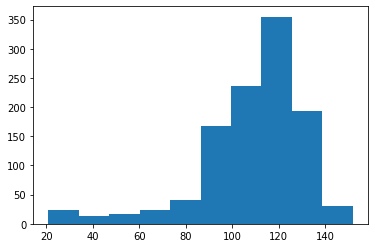

In [42]:
plt.hist(scalerY.inverse_transform(testY))

In [34]:
model1 = RidgeCV(alphas=(0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10), cv=10)
model2 = SVR(C=10, gamma='auto')
model1.fit(trainX, trainY.flatten())

RidgeCV(alphas=array([ 0.01,  0.1 ,  0.2 ,  0.5 ,  1.  ,  2.  ,  5.  , 10.  ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

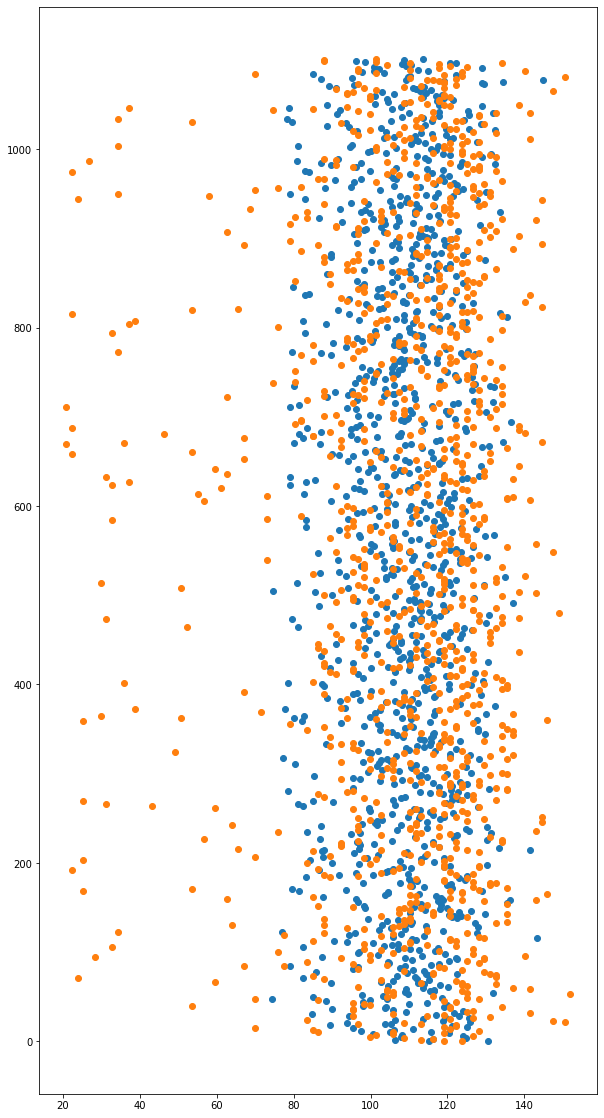

In [38]:
Y_pred = model1.predict(testX)

Y_pred = scalerY.inverse_transform(Y_pred)
Y_real = scalerY.inverse_transform(testY)

plt.figure(figsize=(10, 20))
plt.scatter(Y_pred, range(Y_pred.shape[0]))
plt.scatter(Y_real, range(Y_real.shape[0]))